In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from demographicmodel import DemographicModel

In [4]:
data_dir = '../fastNeutrino/fitted_params/'
chroms = ['Chr2L', 'Chr2R', 'Chr3L', 'Chr3R']
model_types = ['2EpochC',
                '2EpochE',
                '3EpochCC',
                '3EpochCE',
                '3EpochEE']

In [5]:
models = {}
for mt in model_types:
    models[mt] = [DemographicModel(data_dir + chrom + '.' + mt + '.txt') for chrom in chroms]

/Users/dpr/mmc_genomics/src/demographicmodel.py:75: RuntimeWarning: overflow encountered in exp
  return n0*np.exp(-(T-t0)*r)
/Users/dpr/mmc_genomics/src/demographicmodel.py:75: RuntimeWarning: overflow encountered in multiply
  return n0*np.exp(-(T-t0)*r)
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


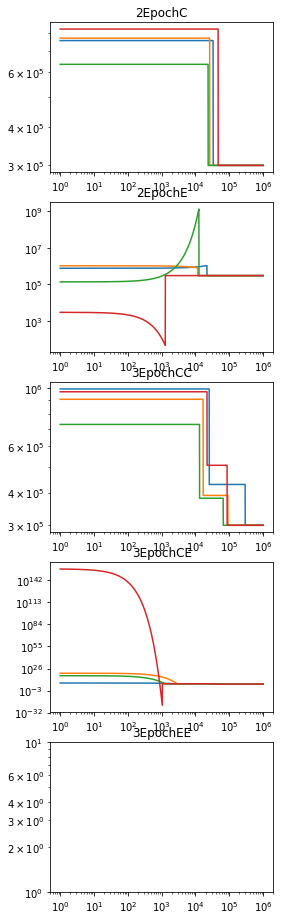

In [6]:
t = np.arange(1e6)
fig = plt.figure(figsize=(4,16))
for i, mt in enumerate(model_types):
    ax = fig.add_subplot(len(model_types), 1, i+1)
    for model in models[mt]:
        ax.loglog(t, model.population_size(t))
    ax.set_title(mt)    
    # plt.ylim([1e5,1e6])

Conclusions: the exponential growth leads to some really unstable results. On the other hand, the constant-size inference seems to be stable and consistent across populations. We should preoceed with that.

## Fixed-t, Piecewise constant-N models

In [7]:
model_types = ['{}Epoch_fixed'.format(i) for i in range(5,11)]
models = {}
for mt in model_types:
    models[mt] = [DemographicModel(data_dir + chrom + '.' + mt + '.txt') for chrom in chroms]

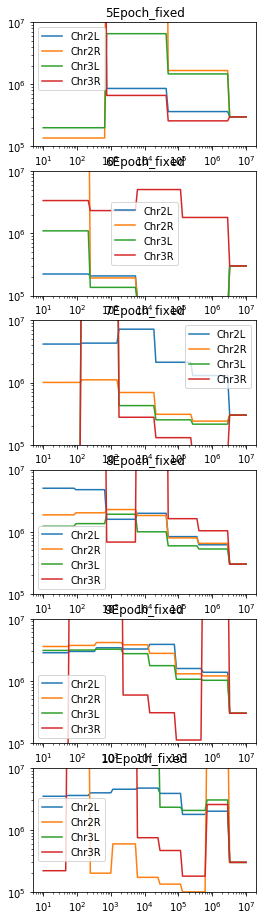

In [8]:
t = np.logspace(1,7,100)
fig = plt.figure(figsize=(4,16))
for i, mt in enumerate(model_types):
    ax = fig.add_subplot(len(model_types), 1, i+1)
    for j, model in enumerate(models[mt]):
        ax.loglog(t, model.population_size(t), label=chroms[j])
    ax.set_title(mt)
    ax.set_ylim([1e5,1e7])
    plt.legend()
    # plt.ylim([1e5,1e6])

It looks like with 9 epochs, we're getting pretty good convergence. It looks like the issue with one chromsome may be about convergence. We can either up the number of restarts, or try to start near the model fit to the other chromosomes.

## Variable-t, piecewise constant N models

In [9]:
model_types = ['{}Epoch_free'.format(i) for i in range(2,11)]
models = {}
for mt in model_types:
    models[mt] = [DemographicModel(data_dir + chrom + '.' + mt + '.txt') for chrom in chroms]

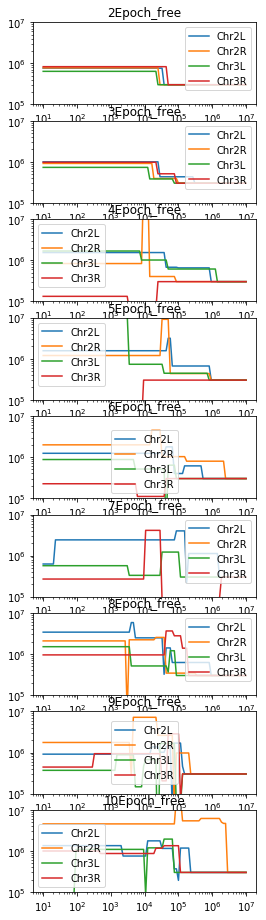

In [10]:
t = np.logspace(1,7,100)
fig = plt.figure(figsize=(4,16))
for i, mt in enumerate(model_types):
    ax = fig.add_subplot(len(model_types), 1, i+1)
    for j, model in enumerate(models[mt]):
        ax.loglog(t, model.population_size(t), label=chroms[j])
    ax.set_title(mt)
    ax.set_ylim([1e5,1e7])
    plt.legend()
    # plt.ylim([1e5,1e6])

With four or more epochs, we're starting to get disagreements, which I think is likely due to numerical convergence. However, the consistent models are qualitatively in agreement with the fixed-spacing models. I think the latter seem more promising.